In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# file_name = 'test.csv'
file_name = '2013-2014.csv'
# file_name = '2014-2015.csv'

### Summary

In [47]:
d = pd.read_csv(file_name, parse_dates=['Date'])
d.tail()

Date Tariff     Ticket  Cash
15092 2014-03-31 15:13:00    55A  30min-1hr   0.3
15093 2014-03-31 15:16:00    55A  30min-1hr   0.4
15094 2014-03-31 15:18:00    55B        2hr   0.6
15095 2014-03-31 16:10:00    55A  30min-1hr   0.3
15096 2014-03-31 16:20:00    55A  30min-1hr   0.3

In [48]:
d['Year-Month'] = d['Date'].map(lambda x: x.strftime('%Y-%m'))
d['Year-Week'] = d['Date'].map(lambda x: x.strftime('%Y-%U'))
d['Day'] = d['Date'].map(lambda x: x.strftime('%a'))
d.tail()

Date Tariff     Ticket  Cash Year-Month Year-Week  Day
15092 2014-03-31 15:13:00    55A  30min-1hr   0.3    2014-03   2014-13  Mon
15093 2014-03-31 15:16:00    55A  30min-1hr   0.4    2014-03   2014-13  Mon
15094 2014-03-31 15:18:00    55B        2hr   0.6    2014-03   2014-13  Mon
15095 2014-03-31 16:10:00    55A  30min-1hr   0.3    2014-03   2014-13  Mon
15096 2014-03-31 16:20:00    55A  30min-1hr   0.3    2014-03   2014-13  Mon

### Total Income by Tariff

In [49]:
d.pivot_table(columns=['Tariff'], aggfunc=np.sum)

Tariff      55A      55B      55C     55D      55E    56A    56B     56C  \
Cash    2514.55  1458.15  1458.35  556.85  1363.55  470.9  245.6  125.45   

Tariff   56D   56E  
Cash    35.8  70.1

In [50]:
d.pivot_table(columns=['Ticket'], aggfunc=np.sum)

Ticket      2hr  30min-1hr     3hr     4hr   AllDay
Cash    1703.75    2985.45  1583.8  592.65  1433.65

### How many all day tickets - and how many short stay.

```
55A    30MIN-1HR      30P
55B    2HR            60P
55C    3HR            90P
55D    4HR         £1.40
55E    ALLDAY      £1.90

56A    30MIN-1HR      30P
56B    2HR            60P
56C    3HR            60P
56D    4HR         £1.40
56E    ALLDAY      £1.90
```

In [51]:
d.Tariff.value_counts(sort=True)

55A    7979
55B    2408
55C    1520
56A    1499
55E     703
56B     405
55D     393
56C     129
56E      36
56D      25
Name: Tariff, dtype: int64

In [52]:
d.Ticket.value_counts(sort=True)

30min-1hr    9478
2hr          2813
3hr          1649
AllDay        739
4hr           418
Name: Ticket, dtype: int64

In [53]:
year_month = d.pivot_table(columns=['Year-Month'], aggfunc=np.sum)
year_month.to_excel('year-month.xls')
year_month.T

Cash
Year-Month         
2013-04      676.70
2013-05      650.95
2013-06      722.30
2013-07     1028.15
2013-08      719.85
2013-09      791.80
2013-10      659.80
2013-11      710.80
2013-12      686.75
2014-01      482.65
2014-02      542.35
2014-03      627.20

In [54]:
year_week = d.pivot_table(columns=['Year-Week'], aggfunc=np.sum)
year_week.T.to_excel('year-week.xls')
year_week.T

Cash
Year-Week        
2013-13    155.00
2013-14    159.10
2013-15    150.60
2013-16    132.70
2013-17    145.70
2013-18    159.00
2013-19    128.15
2013-20    156.10
2013-21    160.90
2013-22    139.80
2013-23    167.90
2013-24    188.65
2013-25    181.95
2013-26    269.20
2013-27    179.60
2013-28    193.90
2013-29    244.90
2013-30    238.85
2013-31    189.05
2013-32    153.40
2013-33    106.25
2013-34    197.25
2013-35    187.45
2013-36    214.90
2013-37    163.50
2013-38    202.10
2013-39    145.25
2013-40    139.05
2013-41    158.40
2013-42    138.45
2013-43    139.20
2013-44    253.85
2013-45    201.10
2013-46     99.05
2013-47    120.10
2013-48    283.80
2013-49    139.85
2013-50    172.10
2013-51     53.40
2013-52     37.60
2014-00     87.80
2014-01     75.50
2014-02    111.50
2014-03    122.25
2014-04    106.40
2014-05    157.30
2014-06     95.20
2014-07    110.20
2014-08    167.05
2014-09    138.60
2014-10    158.70
2014-11    158.45
2014-12    127.85
2014-13     35.40

In [55]:
d.pivot_table(columns=['Ticket'], aggfunc=np.sum).T.sort_values(['Cash'], ascending=[0])

Cash
Ticket            
30min-1hr  2985.45
2hr        1703.75
3hr        1583.80
AllDay     1433.65
4hr         592.65

In [56]:
d.Ticket.value_counts(sort=True)

30min-1hr    9478
2hr          2813
3hr          1649
AllDay        739
4hr           418
Name: Ticket, dtype: int64

In [57]:
t = pd.DataFrame(d.Ticket.value_counts(sort=True))
t.to_excel('ticket-count.xls')

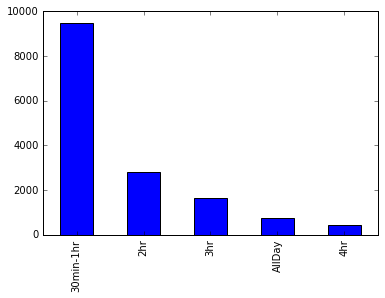

In [58]:
d.Ticket.value_counts(sort=True).plot(kind='bar')

In [59]:
d.Day.value_counts(sort=True)

Tue    4307
Sat    2366
Sun    2094
Fri    1998
Thu    1734
Wed    1367
Mon    1231
Name: Day, dtype: int64

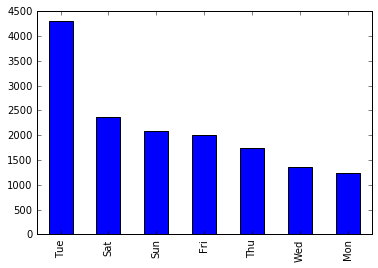

In [60]:
d.Day.value_counts(sort=True).plot(kind='bar')